## Ejercicios API Frankfurter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import requests

from pprint import pprint

### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

#### 1. Primero debemos extraer los datos desde el primer día de este año hasta el día de hoy.
#### 2. Vamos a manipular los datos para tenerlos en una lista o array.

In [10]:
def convertir_moneda(to_currency, año):
    url = "https://api.frankfurter.app"

    amount = 1
    from_currency = "EUR"
    to_currency = to_currency

    date_1 = f"{año-1}-10-23"
    date_2 = f"{año}-10-23"

    endpoint = f"{url}/{date_1}..{date_2}?amount={amount}&from={from_currency}&to={to_currency}"
    print(f"Endpoint: {endpoint}")
    response = requests.get(endpoint)
    pprint(response.json())

    data = response.json()
    fechas = list(data["rates"].keys())
    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
    monedas_covertidas = [data["rates"][fecha][to_currency] for fecha in data["rates"].keys()]

    plt.figure(figsize = (18, 10))

    # Plot (función especial que trabaja con fechas)
    plt.plot_date(x = fechas, y = monedas_covertidas, fmt = "-.")

    #pintar el punto máximo:
    plt.plot(fechas[np.argmax(monedas_covertidas)],
            np.max(monedas_covertidas),
            color = "blue",
            marker = "o",
            markersize = 10,
            label = f"Donde {from_currency} obtuvo el máximo en {to_currency}s")

    #pintar el punto mínimo:
    plt.plot(fechas[np.argmin(monedas_covertidas)],
            np.min(monedas_covertidas),
            color = "green",
            marker = "o",
            markersize = 10,
            label = f"Donde {from_currency} obtuvo el mínimo en {to_currency}")

    #evitar que se superpongan fechas en la gráfica:
    plt.gcf().autofmt_xdate()

    #evitar que se superpongan datos en los ejes:
    #plt.xticks(rotation =45)
    #plt.yticks(rotation =45)

    #Etiquetas:
    plt.legend()
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(f"{to_currency}", fontsize = 20)
    plt.title(f"Relación entre {from_currency} - {to_currency}", fontsize = 20)

    plt.grid()
    plt.show()

    plt.savefig(f"Conversion_{to_currency}_to_{to_currency}.png")

    print(f"Valor máximo de {from_currency} convertido a {to_currency}: {max(monedas_covertidas)}")
    print(f"Valor mínimo de {from_currency} convertido a {to_currency}: {min(monedas_covertidas)}")

    columnas_names = ["FECHA", "CONVERSIÓN"]
    columnas_data = [fechas, monedas_covertidas]

    diccionario = {name : data for name, data in zip(columnas_names, columnas_data)}

    df_conversion = pd.DataFrame(diccionario)

    # Guardamos el df sin el índice
    df_conversion.to_excel(f"df_conversion_{from_currency}_to_{to_currency}.xlsx", index=False)

    return df_conversion


Endpoint: https://api.frankfurter.app/2022-10-23..2023-10-23?amount=1&from=EUR&to=USD
{'amount': 1.0,
 'base': 'EUR',
 'end_date': '2023-10-23',
 'rates': {'2022-10-24': {'USD': 0.9851},
           '2022-10-25': {'USD': 0.9861},
           '2022-10-26': {'USD': 1.0023},
           '2022-10-27': {'USD': 1.0037},
           '2022-10-28': {'USD': 0.9951},
           '2022-10-31': {'USD': 0.9914},
           '2022-11-01': {'USD': 0.9947},
           '2022-11-02': {'USD': 0.9908},
           '2022-11-03': {'USD': 0.9753},
           '2022-11-04': {'USD': 0.9872},
           '2022-11-07': {'USD': 0.9993},
           '2022-11-08': {'USD': 0.9996},
           '2022-11-09': {'USD': 1.0039},
           '2022-11-10': {'USD': 0.9954},
           '2022-11-11': {'USD': 1.0308},
           '2022-11-14': {'USD': 1.0319},
           '2022-11-15': {'USD': 1.0404},
           '2022-11-16': {'USD': 1.0412},
           '2022-11-17': {'USD': 1.0319},
           '2022-11-18': {'USD': 1.0366},
           '202

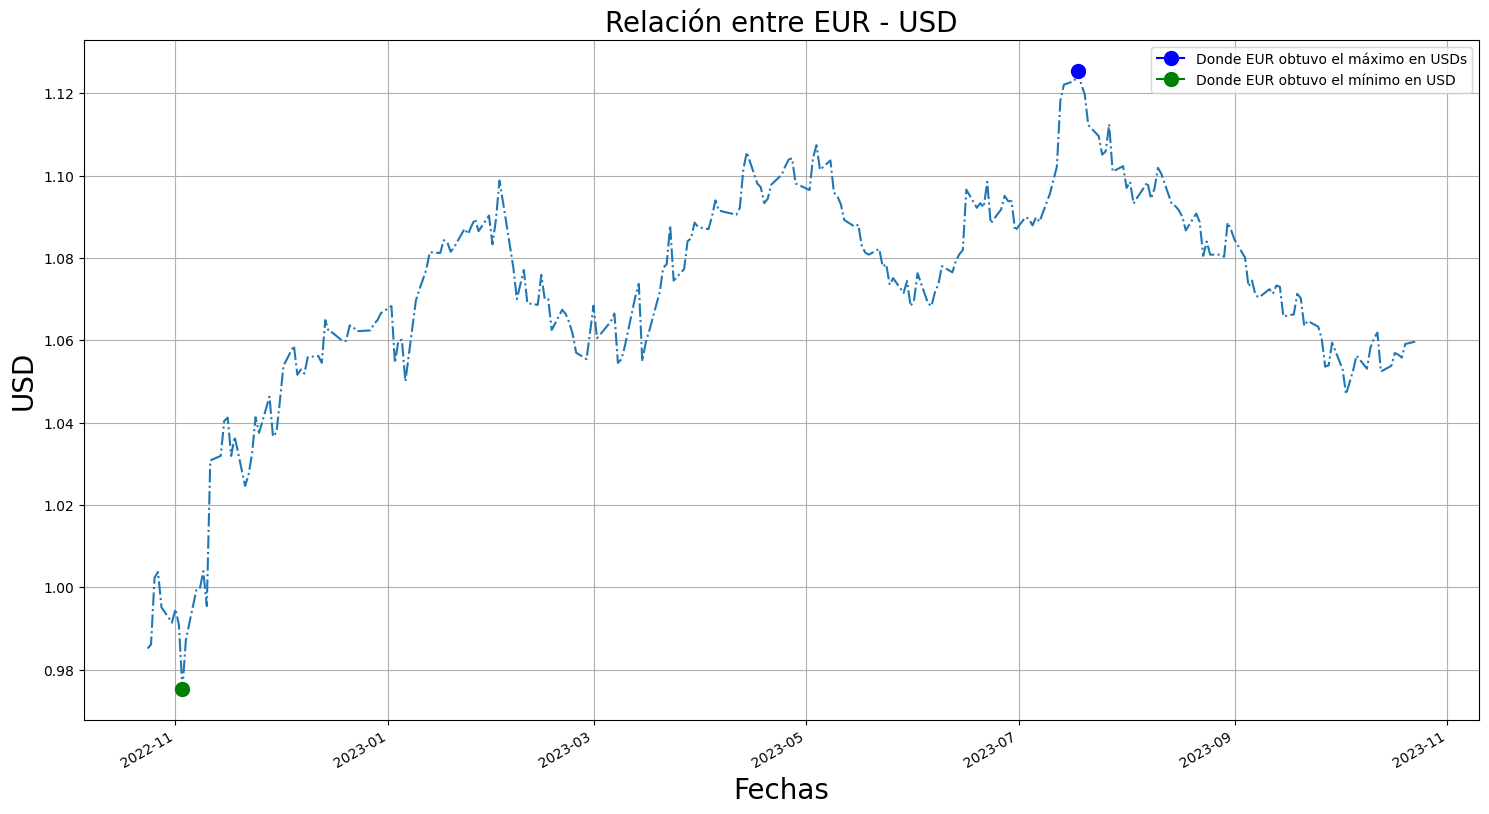

Valor máximo de EUR convertido a USD: 1.1255
Valor mínimo de EUR convertido a USD: 0.9753


,FECHA,CONVERSIÓN
0,2022-10-24,0.9851
1,2022-10-25,0.9861
2,2022-10-26,1.0023
3,2022-10-27,1.0037
4,2022-10-28,0.9951
...,...,...
252,2023-10-17,1.0569
253,2023-10-18,1.0565
254,2023-10-19,1.0558
255,2023-10-20,1.0591


<Figure size 640x480 with 0 Axes>

In [11]:
convertir_moneda("USD", 2023)

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.

In [44]:
def convertir_monedas(año, lista, moneda):
    url = "https://api.frankfurter.app"

    amount = 1
    lista_currencys = lista
    to_currency = moneda
    año = año

    date_1 = f"{año-1}-10-23"
    date_2 = f"{año}-10-23"

    lista_fechas = []
    conversiones = []
    nombre_columnas = ["Fechas"]
    data_columnas = []
#lista_currencys = ["USD", "GBP", "COP"]
#to_currency = "EUR"
    for from_currency in lista_currencys:
        endpoint = f"{url}/{date_1}..{date_2}?amount={amount}&from={from_currency}&to={to_currency}"
        print(f"Endpoint: {endpoint}")
        response = requests.get(endpoint)
        pprint(response.json())

        data = response.json()
        fechas = list(data["rates"].keys())
        fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
        monedas_covertidas = [data["rates"][fecha][to_currency] for fecha in data["rates"].keys()]

        lista_fechas.append(fechas)
        conversiones.append(monedas_covertidas)
        #nombre_columnas.append(f"fechas")
        nombre_columnas.append(f"conversion {from_currency} to {to_currency}")

        monedas_covertidas = []

    data_columnas.append(lista_fechas[0])

    for conversion in conversiones:
        
        data_columnas.append(conversion)


    diccionario2 = {name : data for name, data in zip(nombre_columnas, data_columnas)}
    df_conversiones = pd.DataFrame(diccionario2)
    df_conversiones
    return (df_conversiones)

In [49]:
lista = ["USD", "GBP", "CAD"]

In [50]:
convertir_monedas(2023, lista, "EUR")

Endpoint: https://api.frankfurter.app/2022-10-23..2023-10-23?amount=1&from=USD&to=EUR
{'amount': 1.0,
 'base': 'USD',
 'end_date': '2023-10-23',
 'rates': {'2022-10-24': {'EUR': 1.0151},
           '2022-10-25': {'EUR': 1.0141},
           '2022-10-26': {'EUR': 0.99771},
           '2022-10-27': {'EUR': 0.99631},
           '2022-10-28': {'EUR': 1.0049},
           '2022-10-31': {'EUR': 1.0087},
           '2022-11-01': {'EUR': 1.0053},
           '2022-11-02': {'EUR': 1.0093},
           '2022-11-03': {'EUR': 1.0253},
           '2022-11-04': {'EUR': 1.013},
           '2022-11-07': {'EUR': 1.0007},
           '2022-11-08': {'EUR': 1.0004},
           '2022-11-09': {'EUR': 0.99612},
           '2022-11-10': {'EUR': 1.0046},
           '2022-11-11': {'EUR': 0.97012},
           '2022-11-14': {'EUR': 0.96909},
           '2022-11-15': {'EUR': 0.96117},
           '2022-11-16': {'EUR': 0.96043},
           '2022-11-17': {'EUR': 0.96909},
           '2022-11-18': {'EUR': 0.96469},
       

,Fechas,conversion USD to EUR,conversion GBP to EUR,conversion CAD to EUR
0,2022-10-24,1.01510,1.1485,0.74063
1,2022-10-25,1.01410,1.1475,0.73872
2,2022-10-26,0.99771,1.1547,0.73703
3,2022-10-27,0.99631,1.1528,0.73142
4,2022-10-28,1.00490,1.1612,0.73844
...,...,...,...,...
252,2023-10-17,0.94616,1.1518,0.69391
253,2023-10-18,0.94652,1.1546,0.69324
254,2023-10-19,0.94715,1.1481,0.69037
255,2023-10-20,0.94420,1.1466,0.69004
